In [26]:
import os
import pathlib
import sys
from dataclasses import asdict, replace

import matplotlib.pyplot as plt
import netket as nk
import pandas as pd
import numpy as np

project_path = pathlib.Path(os.getcwd()).parent
sys.path.append(project_path.as_posix())

from src.app import App
from src.model.struct import ChainConfig
from src.utils import report_name
from src.result.struct import Result

In [35]:
chain_cfg = ChainConfig(
    spin=1 / 2,
    gamma=0,
    lam=0,
    j=-1,
    n=16,
    h=0.0,
    pbc=False,
)

In [36]:
DATA = pathlib.Path("../" + App.path_data)
REPORT_DATA = DATA / report_name(chain_cfg)

In [37]:
data = pd.read_csv(REPORT_DATA, delimiter=",")
data.head()

,spin,gamma,lam,j,n,h,pbc,symmetries,name,estimated_e,estimated_e_var,estimated_1z,estimated_nz,estimated_xx,estimated_yy,estimated_zz,estimated_zz_mid
0,0.5,0,0,-1,16,0.000000,False,"['mirror', 'z2_emb']",xx,-15.03467,14.37480,0.02667,0.05200,1.0,-0.04,0.04,0.00675
1,0.5,0,0,-1,16,0.015152,False,"['mirror', 'z2_emb']",xx,-15.03303,14.40666,0.02267,0.03733,1.0,-0.04,0.04,0.00675


In [41]:
hilbert = nk.hilbert.Spin(N=chain_cfg.n, s=chain_cfg.spin)

h = data["h"]
# h = np.linspace(0, 1.5, 100)
e = []
for curr_h in h:
    chain_cfg = replace(chain_cfg, h=curr_h)
    en = Result.analytical_energy(chain_cfg, hilbert, order=0)
    e.append(en / chain_cfg.n)

In [42]:
e

[np.float64(-1.2297439309324305), np.float64(-1.2297439309324256)]

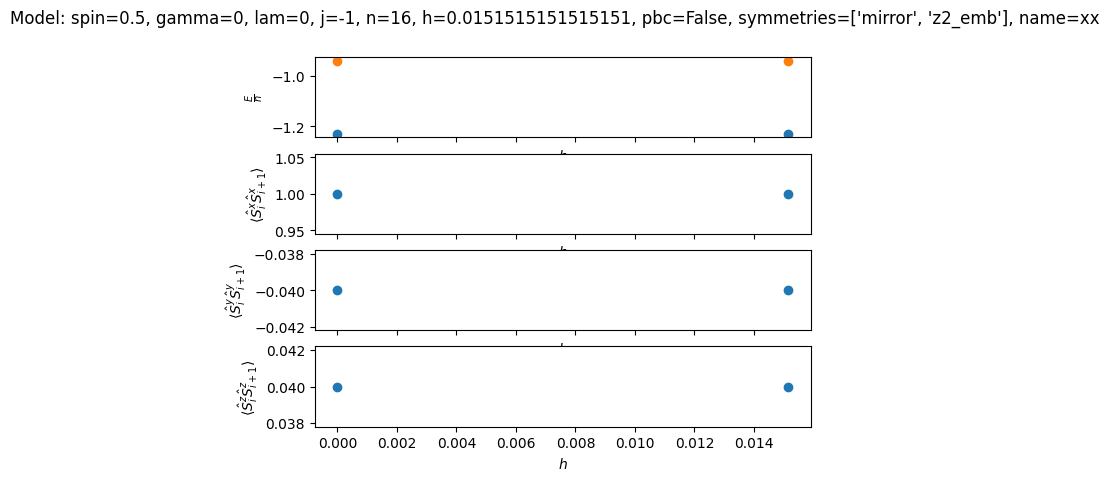

In [43]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=False)
suptitle = "Model: "
suptitle += ", ".join(map(lambda kv: f"{kv[0]}={kv[1]}", asdict(chain_cfg).items()))
fig.suptitle(suptitle)

ax[0].set(xlabel=r"$h$", ylabel=r"$\frac{E}{n}$")
ax[0].scatter(h, e)
ax[0].scatter(h, data["estimated_e"] / chain_cfg.n)

ax[1].set(xlabel=r"$h$", ylabel=r"$\langle \hat{S}_i^x \hat{S}_{i+1}^x \rangle$")
ax[1].scatter(h, data["estimated_xx"])

ax[2].set(xlabel=r"$h$", ylabel=r"$\langle \hat{S}_i^y \hat{S}_{i+1}^y \rangle$")
ax[2].scatter(h, data["estimated_yy"])

ax[3].set(xlabel=r"$h$", ylabel=r"$\langle \hat{S}_i^z \hat{S}_{i+1}^z \rangle$")
ax[3].scatter(h, data["estimated_zz"])

plt.show()

In [5]:
h = np.linspace(0, 1.5, 100)
xy_dict = dict()
for curr_h in h:
    chain_cfg.h = curr_h
    xy_res = Result.analytical_xy(chain_cfg)
    for xy_k, xy_v in xy_res.items():
        if xy_k not in xy_dict:
            xy_dict[xy_k] = []
        xy_dict[xy_k].append(xy_v)

fig, ax = plt.subplots(nrows=len(xy_dict), ncols=1, sharex=True, sharey=False)
suptitle = "Model: "
suptitle += ", ".join(map(lambda kv: f"{kv[0]}={kv[1]}", asdict(chain_cfg).items()))
fig.suptitle(suptitle)

for i, (xy_k, xy_v) in enumerate(xy_dict.items()):
    ax[i].set(xlabel=r"$h$", ylabel=xy_k)
    ax[i].scatter(h, xy_v)

plt.show()

ValueError: type is not xy